# Machine Learning Models
Compare models using barplot
Accuracy score algorithm
1. Logistic regression
2. KNN K-nearest neighbor
3. SVM Support Vector Machines
4. Naive Bayes - Gaussian Naive Bayes
5. Decision Tree Classifier
4. Random Forest Classifier
5. Confusion Matrixes

In [22]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz # visualization of the leaf nodes

#ML for regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Control display
pd.options.display.max_columns=50
sns.set(style='darkgrid', rc={'axes.facecolor':'#DCDCDC'})

#ignore warning
import warnings
warnings.filterwarnings('ignore')

In [23]:
#Reading the dataset
df = pd.read_csv('heart_disease.csv')
df.head()#show 1st five rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [24]:
#Logistic Regression
#column targets
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [25]:
#Show the mean
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


Text(0.5, 1.0, 'heart disease vs age and max heart rate')

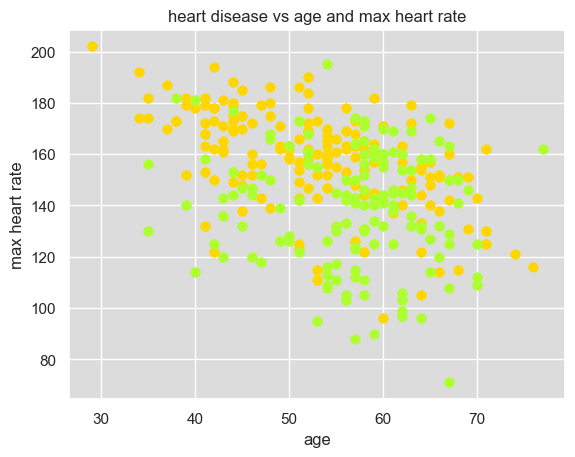

In [26]:
#Creating a scatter plot for heart disease vs age and maximan heart rate
plt.scatter(x=df.age[df.target == 1], y = df.thalach[df.target == 1], c='#FFD700', label='Disease')
plt.scatter(x=df.age[df.target == 0], y = df.thalach[df.target == 0], c='#ADFF2F', label='Not Disease')

#Add a legend
plt.legend
#Add labels to axes
plt.xlabel('age')
plt.ylabel('max heart rate')

#set the title of plot
plt.title('heart disease vs age and max heart rate')


In [27]:
#Create a logistic regression
#create a independant & dependant variable
y = df.target.values
x_data = df.drop(['target'], axis=1)

In [28]:
#Normalize the data
x = (x_data - np.min(x_data)) / np.max(x_data)

In [29]:
#Split the data for training 80% and testing 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [30]:
#Transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [31]:
#Get the test accuracy
accuracies = {}
lr = LogisticRegression()
lr.fit(x_train.T, y_train.T)
acc = lr.score(x_test.T, y_test.T)*100

accuracies['LogisticRegression'] = acc

#get output
print('Test accuracy {:.2f}%'.format(acc))

Test accuracy 72.68%


In [32]:
#import library for K-NN(K-Nearest Neighbors)
#Get accuracy score of KNN algo
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

#Get output
print('{} NN score: {:.2f}%'.format(2, knn.score(x_test.T, y_test.T)*100))


2 NN score: 95.12%


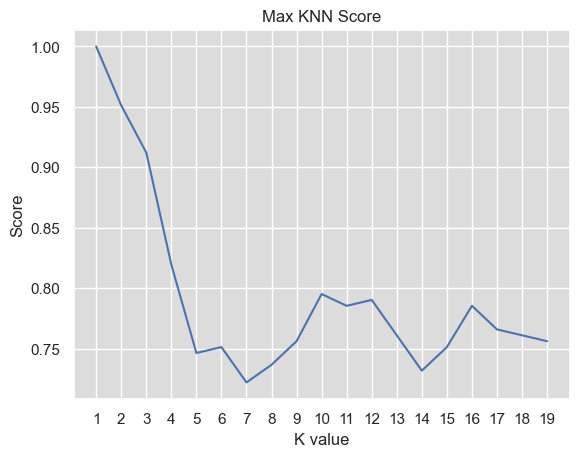

max KNN Score is 100.00


In [33]:
#Get max KNN score for model
score_list = []
for i in range(1, 20):
    knn2 = KNeighborsClassifier(n_neighbors= i)
    knn2.fit(x_train.T, y_train.T)
    score_list.append(knn2.score(x_test.T, y_test.T))

#show using line plot
plt.plot(range(1,20), score_list)
plt.xticks(np.arange(1,20,1))
plt.xlabel('K value')
plt.ylabel('Score')
plt.title('Max KNN Score')
plt.show()

#Get max KNN Score in percentage
acc =  max(score_list) * 100
accuracies['KNN'] = acc
print('max KNN Score is {:.2f}'.format(acc))

In [34]:
#Get test accuracy using the SVM algorithm
from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_train.T, y_train.T)*100
accuracies['SVM'] = acc
print("test accuracy of SVM algorithm: {:.2f}%".format(acc))

test accuracy of SVM algorithm: 70.24%


In [35]:
# Get accuracy using the Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB ()
nb.fit(x_train.T, y_train. T)

acc =nb.score(x_test.T, y_test. T) * 100 
accuracies['Naive Bayes'] = acc
print('Accuracy of Naive Bayes: {:.2f} %'. format (acc))

Accuracy of Naive Bayes: 85.37 %


In [36]:
#Get accuracy using decision tree model 
# Get accuracy using decision tree model
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T) * 100 
accuracies ['Decision Tree'] = acc

print('Decision Free Test Accuracy {:.2f}%' . format (acc))

Decision Free Test Accuracy 100.00%


In [37]:
# Get accuracy of Random Forest Classification Algorithm
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier (n_estimators = 1000, random_state = 1) 
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T, y_test.T) * 100
accuracies ['Random Forest'] = acc

print('Random Forest Alogrithm Accuracy Score: {:.2f}%'.format(acc))

Random Forest Alogrithm Accuracy Score: 100.00%


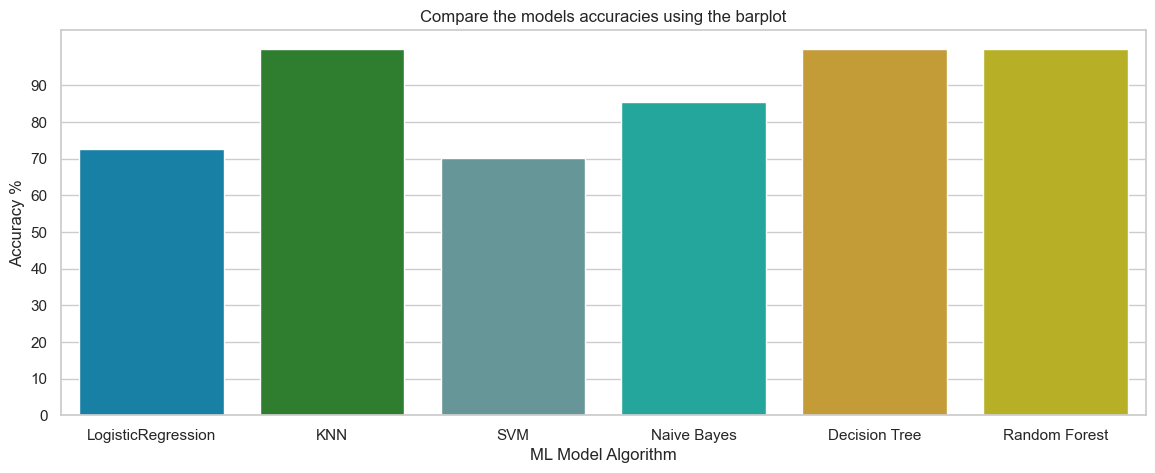

In [38]:
#Compare the models accuracies using the barplot from sns
colors = ['#008BBB', '#228B22', '#5F9EA0', '#0FBBAE', '#DAA520', '#CFC60E' ]

sns.set_style('whitegrid')
plt.figure(figsize=(14,5))
plt.yticks(np.arange (0, 100, 10))
plt.title('Compare the models accuracies using the barplot')
plt.ylabel('Accuracy %')
plt.xlabel('ML Model Algorithm')
sns.barplot(x=list (accuracies.keys()), y=list(accuracies.values()), palette=colors) 
plt.show()

In [39]:
# ML Confusion Matrix
# Evaluate the performance of a classification model

#summary
#True Positive (TP): The number of instances correctly predicted as positive (correctly classified as the positive class) 
#True Negative (TN): The number of instances correctly predicted as negative (correctly classified as the negative class)
#False Positive (FP): The number of instances incorrectly predicted as positive (incorrectly classified as the positive cl 
#False Negative (FN): The number of instances incorrectly predicted as negative (incorrectly classified as the negative cl 
#ROC Curve and AUC: ROC (Receiver Operating Characteristic) AUC (Area Under the Curve)


In [40]:
# Get confusi matrices to look at the imbalance dataset
# Predicted values
y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier (n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T) 
y_head_svm = svm. predict(x_test.T) 
y_head_nb = nb.predict(x_test.T) 
y_head_dtc = dtc.predict(x_test.T) 
y_head_rf = rf.predict (x_test. T)

In [41]:
# Import module for confusion matrix 
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head_lr) 
cm_knn = confusion_matrix(y_test, y_head_knn) 
cm_svm = confusion_matrix(y_test, y_head_svm) 
cm_nb = confusion_matrix(y_test, y_head_nb) 
cm_dtc = confusion_matrix(y_test, y_head_dtc) 
cm_rf = confusion_matrix(y_test, y_head_rf)

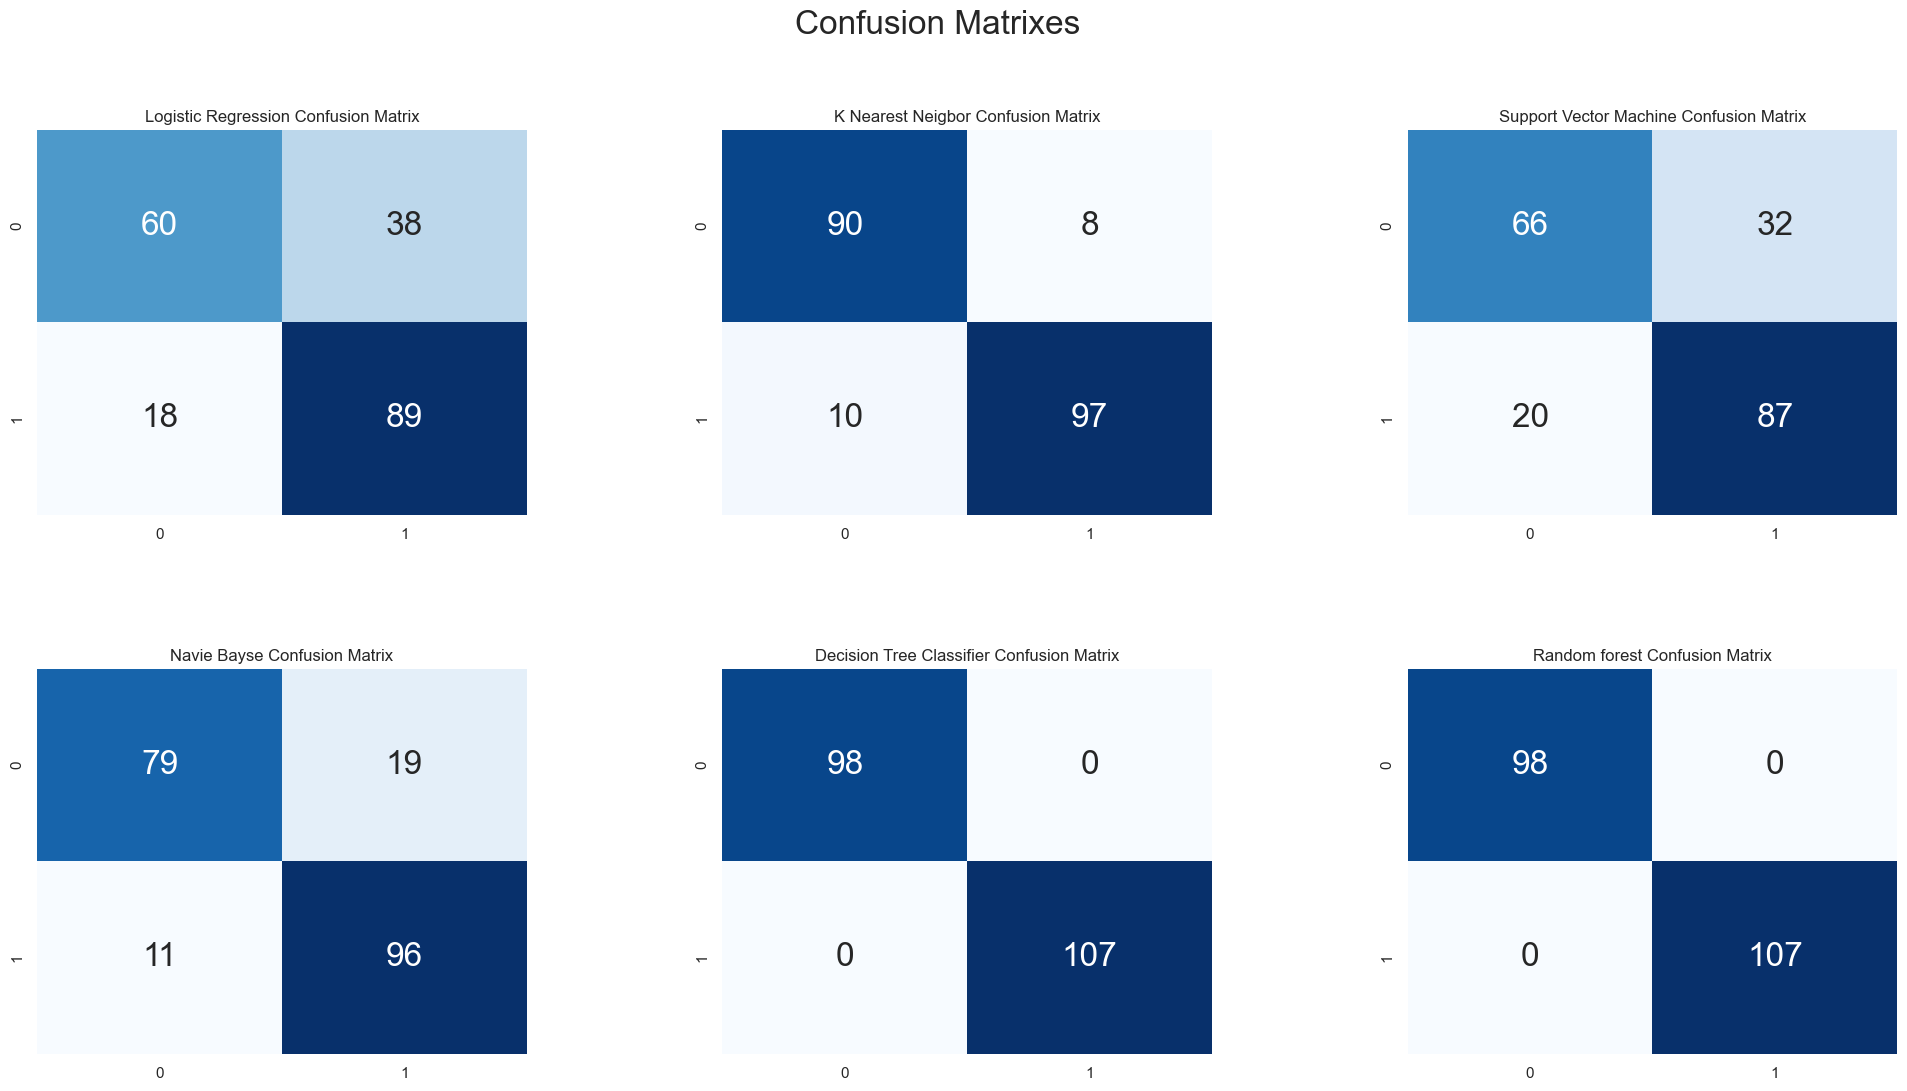

In [42]:
# Plot Confusion Matrixes using heatmap 
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrixes", fontsize=24) 
plt.subplots_adjust (wspace = 0.4, hspace= 0.4)

# Heatmap for Logistic egression Confusion Matrix 
plt.subplot (2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap (cm_lr, annot=True, cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

# Heatmap for K Nearest Neigbor Confusion Matrix
plt.subplot (2,3,2)
plt.title("K Nearest Neigbor Confusion Matrix")
sns.heatmap(cm_knn,annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

# Heatmap for Support Vector Machine Confusion Matrix
plt.subplot (2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

# Heatmap for Navie Bayse Confusion Matrix
plt.subplot (2,3,4)
plt.title("Navie Bayse Confusion Matrix")
sns.heatmap(cm_nb,annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

# Heatmap for Decision Tree Classifier Confusion Matrix
plt.subplot (2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

# Heatmap for Random forest Confusion Matrix
plt.subplot (2,3,6)
plt.title("Random forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

plt.show()